In [13]:
%config IPCompleter.greedy=True
%matplotlib inline

import pandas as pd

df_train = pd.read_csv('train_kaggle.csv')
df_test = pd.read_csv('sample_solution.csv')
y = df_train['label']

In [14]:
def load_dataframe(id):
    train_data = np.load("train/train/{}.npy".format(id))
    return train_data

def load_dataframe_test(id):
    test_data = np.load("test/test/{}.npy".format(id))
    return test_data

def replace_nan(df):
    #Obtain mean of columns as you need, nanmean is just convenient.
    col_mean = np.nanmean(df, axis=0)
    col_mean = np.nan_to_num(col_mean)
    
    #Find indicies that you need to replace
    inds = np.where(np.isnan(df))

    #Place column means in the indices. Align the arrays using take
    df[inds] = np.take(col_mean, inds[1])
    return df

def compute_features(df):
    sumCol = np.sum(df, axis=0).reshape(1, -1)
    # meanCol = np.mean(df, axis=0).reshape(1, -1)
    # dataCol = np.concatenate([sumCol, meanCol], axis=1)
    dataCol = sumCol
    return dataCol

In [15]:
import numpy as np
replace_nan(load_dataframe(0)).shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


(54, 40)

In [16]:
import numpy as np
from tqdm import tqdm

XTrain = []
for id in tqdm(df_train['Id']):
    dfi = compute_features(replace_nan(load_dataframe(id)))
    XTrain.append(dfi)

XTrain = np.concatenate(XTrain, axis=0)
XTrain.shape

  0%|                                                               | 0/30336 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
100%|███████████████████████████████████████████████████| 30336/30336 [09:03<00:00, 55.86it/s]


(30336, 40)

In [17]:
from tqdm import tqdm

XTest = []
for id in tqdm(df_test['Id']):
    dfi = compute_features(replace_nan(load_dataframe_test(id)))
    XTest.append(dfi)
XTest = np.concatenate(XTest, axis=0)
XTest.shape

  0%|                                                               | 0/10000 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
100%|███████████████████████████████████████████████████| 10000/10000 [02:16<00:00, 73.42it/s]


(10000, 40)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(XTrain, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(24268, 40)
(6068, 40)
(24268,)
(6068,)


In [19]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn import metrics

model = LGBMClassifier()
model.fit(X_train, y_train)
pred = model.predict_proba(X_valid)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_valid, pred)
auc_score = metrics.auc(fpr, tpr)
auc_score

0.9268249948407903

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_column_names():
    columnNames = []
    for i in range(40):
        columnNames.append(str(i) + '_sum')
        # columnNames.append(str(i) + '_mean')
    return columnNames

def plot_corr(df):
    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

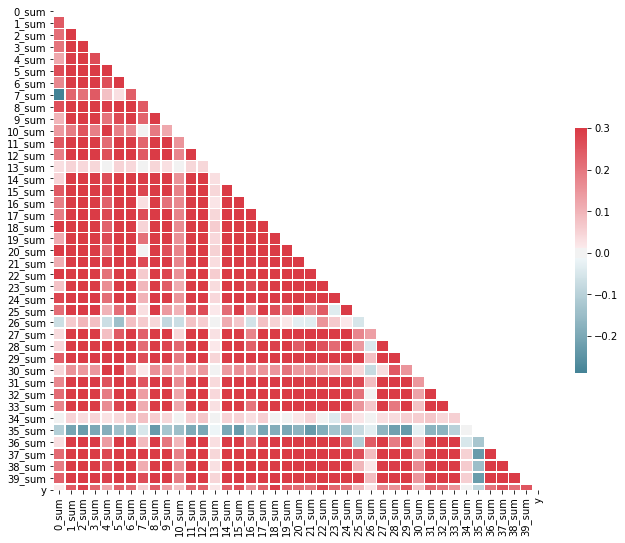

In [21]:
df = pd.DataFrame(data=XTrain, columns=get_column_names())
df['y'] = y
plot_corr(df)

In [22]:
df.corr()['y']

0_sum     0.014838
1_sum     0.249126
2_sum     0.288035
3_sum     0.226595
4_sum     0.116610
5_sum     0.234332
6_sum     0.225377
7_sum     0.054900
8_sum     0.241315
9_sum     0.129212
10_sum    0.072943
11_sum    0.226264
12_sum    0.237124
13_sum    0.018712
14_sum    0.235282
15_sum    0.264121
16_sum    0.159285
17_sum    0.237633
18_sum    0.294347
19_sum    0.234390
20_sum    0.221385
21_sum    0.199815
22_sum    0.285474
23_sum    0.227901
24_sum    0.210356
25_sum    0.099368
26_sum    0.019675
27_sum    0.176694
28_sum    0.155563
29_sum    0.254778
30_sum    0.072445
31_sum    0.226100
32_sum    0.211910
33_sum    0.151358
34_sum    0.011669
35_sum   -0.086330
36_sum    0.206073
37_sum    0.261662
38_sum    0.211273
39_sum    0.253381
y         1.000000
Name: y, dtype: float64

In [23]:
df.corr()['y'].sort_values(ascending=False)

y         1.000000
18_sum    0.294347
2_sum     0.288035
22_sum    0.285474
15_sum    0.264121
37_sum    0.261662
29_sum    0.254778
39_sum    0.253381
1_sum     0.249126
8_sum     0.241315
17_sum    0.237633
12_sum    0.237124
14_sum    0.235282
19_sum    0.234390
5_sum     0.234332
23_sum    0.227901
3_sum     0.226595
11_sum    0.226264
31_sum    0.226100
6_sum     0.225377
20_sum    0.221385
32_sum    0.211910
38_sum    0.211273
24_sum    0.210356
36_sum    0.206073
21_sum    0.199815
27_sum    0.176694
16_sum    0.159285
28_sum    0.155563
33_sum    0.151358
9_sum     0.129212
4_sum     0.116610
25_sum    0.099368
10_sum    0.072943
30_sum    0.072445
7_sum     0.054900
26_sum    0.019675
13_sum    0.018712
0_sum     0.014838
34_sum    0.011669
35_sum   -0.086330
Name: y, dtype: float64

In [24]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf = ExtraTreesClassifier(n_estimators=50)
# clf = GradientBoostingClassifier()
clf = clf.fit(XTrain, y)
clf.feature_importances_

array([0.01718932, 0.02919678, 0.04827281, 0.04652072, 0.01432417,
       0.01817655, 0.02880395, 0.01560396, 0.04204213, 0.01677156,
       0.00643967, 0.02324852, 0.02501545, 0.02459236, 0.03145503,
       0.03479664, 0.00979968, 0.03518847, 0.04836554, 0.01970022,
       0.02668695, 0.01760966, 0.02311726, 0.03147463, 0.0259783 ,
       0.00773041, 0.01351999, 0.01834834, 0.01516227, 0.05354516,
       0.01363583, 0.03009331, 0.01945322, 0.02109818, 0.00751052,
       0.01797881, 0.0235665 , 0.03260248, 0.01678794, 0.04859669])

In [25]:
clf.feature_importances_ > 0.02

array([False,  True,  True,  True, False, False,  True, False,  True,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False,  True,  True,  True, False, False,
       False, False,  True, False,  True, False,  True, False, False,
        True,  True, False,  True])

In [26]:
model = LGBMClassifier()
model.fit(X_train, y_train)
pred = model.predict_proba(X_valid)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_valid, pred)
auc_score = metrics.auc(fpr, tpr)
auc_score

0.9268249948407903

In [27]:
model.feature_importances_

array([ 53,  73, 147, 142,  41,  87,  56,  32,  71, 100,  26,  88,  71,
       114,  62, 114,  46,  99,  41,  74,  43,  95,  52,  66,  89,  29,
        80,  96,  59,  50,  60,  53, 107,  57,  47, 158,  76, 117,  70,
        59])

In [35]:
model.feature_importances_ < np.mean(model.feature_importances_)

array([ True,  True, False, False,  True, False,  True,  True,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True,  True,  True, False,  True,  True, False,  True, False,
       False,  True,  True,  True,  True, False,  True,  True, False,
       False, False,  True,  True])

In [32]:
np.mean(model.feature_importances_)

75.0

In [33]:
np.where(model.feature_importances_ < 70)

(array([ 0,  4,  6,  7, 10, 14, 16, 18, 20, 22, 23, 25, 28, 29, 30, 31, 33,
        34, 39], dtype=int64),)

In [126]:
np.where(clf.feature_importances_ < 0.01)

(array([10, 16, 25, 34], dtype=int64),)

In [3]:
import numpy as np
fi = np.array([0.01566935, 0.02649767, 0.04107267, 0.04412156, 0.01460983,
       0.01841416, 0.02811621, 0.01515124, 0.04089081, 0.01662181,
       0.00624083, 0.02439701, 0.0247147 , 0.0228639 , 0.03131602,
       0.03987609, 0.00994603, 0.03620459, 0.04771724, 0.01660164,
       0.02890663, 0.01842027, 0.02976564, 0.04567926, 0.02365328,
       0.00737686, 0.01296379, 0.01808307, 0.01507807, 0.0459507 ,
       0.01320972, 0.03764166, 0.02124003, 0.02414404, 0.00769764,
       0.01872731, 0.01926006, 0.02734829, 0.01640777, 0.04740254])
fi > 0.02

array([False,  True,  True,  True, False, False,  True, False,  True,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False,  True,  True,  True, False, False,
       False, False,  True, False,  True,  True,  True, False, False,
       False,  True, False,  True])

In [5]:
np.where(fi < 0.02)

(array([ 0,  4,  5,  7,  9, 10, 16, 19, 21, 25, 26, 27, 28, 30, 34, 35, 36,
        38], dtype=int64),)

In [12]:
np.where(fi < 0.018)

(array([ 0,  4,  7,  9, 10, 16, 19, 25, 26, 28, 30, 34, 38], dtype=int64),)

In [9]:
np.where(fi > 0.03)[0].shape

(11,)

In [8]:
fi > 0.03

array([False, False,  True,  True, False, False, False, False,  True,
       False, False, False, False, False,  True,  True, False,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True])